In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Shark Tank India.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

   

In [2]:
# 1. Tidy up Column Names
df.columns = df.columns.str.strip()

# 2. Convert Data Types
# Convert date columns to datetime objects
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'], format='%d-%b-%y', errors='coerce')
df['Season Start'] = pd.to_datetime(df['Season Start'], format='%d-%b-%y', errors='coerce')
df['Season End'] = pd.to_datetime(df['Season End'], format='%d-%b-%y', errors='coerce')

# Clean and convert 'Cash Burn' to numeric. It has some non-numeric values, so we'll coerce errors.
df['Cash Burn'] = pd.to_numeric(df['Cash Burn'], errors='coerce')

# 3. Handle Missing Values
# Fill NaN values in 'Male Presenters' and 'Female Presenters' with 0
df['Male Presenters'] = df['Male Presenters'].fillna(0).astype(int)
df['Female Presenters'] = df['Female Presenters'].fillna(0).astype(int)

# For 'Accepted Offer', NaN means no deal was accepted. So, we'll fill NaN with 0.
df['Accepted Offer'] = df['Accepted Offer'].fillna(0).astype(int)

# For deal-specific columns, NaN means no deal. Let's fill these with 0.
deal_cols = ['Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt', 'Deal Valuation', 'Number of Sharks in Deal']
for col in deal_cols:
    df[col] = df[col].fillna(0)

# For individual shark investment columns, NaN means no investment from that shark.
shark_investment_cols = [
    'Namita Investment Amount', 'Namita Investment Equity', 'Namita Debt Amount',
    'Vineeta Investment Amount', 'Vineeta Investment Equity', 'Vineeta Debt Amount',
    'Anupam Investment Amount', 'Anupam Investment Equity', 'Anupam Debt Amount',
    'Aman Investment Amount', 'Aman Investment Equity', 'Aman Debt Amount',
    'Peyush Investment Amount', 'Peyush Investment Equity', 'Peyush Debt Amount',
    'Ritesh Investment Amount', 'Ritesh Investment Equity', 'Ritesh Debt Amount',
    'Amit Investment Amount', 'Amit Investment Equity', 'Amit Debt Amount',
    'Guest Investment Amount', 'Guest Investment Equity', 'Guest Debt Amount'
]
for col in shark_investment_cols:
    df[col] = df[col].fillna(0)

# 4. Refine Categorical Data
# Let's see the unique values in 'Pitchers Average Age'
print("Unique values in 'Pitchers Average Age':")
print(df['Pitchers Average Age'].unique())

# Clean the 'Pitchers Average Age' column. Let's keep it as categories.
df['Pitchers Average Age'] = df['Pitchers Average Age'].str.strip()


# Display the info of the cleaned dataframe
print("\nCleaned DataFrame Info:")
df.info()

# Let's save the cleaned data to a new CSV file for our Power BI analysis.
df.to_csv('Shark Tank India Cleaned.csv', index=False)

print("\nCleaned data saved to 'Shark Tank India Cleaned.csv'")

Unique values in 'Pitchers Average Age':
['Middle' 'Young' 'Old']

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Season Number              634 non-null    int64         
 1   Startup Name               634 non-null    object        
 2   Episode Number             634 non-null    int64         
 3   Pitch Number               634 non-null    int64         
 4   Season Start               634 non-null    datetime64[ns]
 5   Season End                 634 non-null    datetime64[ns]
 6   Original Air Date          603 non-null    datetime64[ns]
 7   Episode Title              634 non-null    object        
 8   Anchor                     634 non-null    object        
 9   Industry                   634 non-null    object        
 10  Business Description       634 non-null    

In [3]:
# Calculate the deal success rate
received_offer_count = df['Received Offer'].sum()
accepted_offer_count = df[df['Accepted Offer'] == 1]['Accepted Offer'].count()
total_pitches = len(df)

received_offer_rate = (received_offer_count / total_pitches) * 100
accepted_offer_rate = (accepted_offer_count / total_pitches) * 100

print(f"Total number of pitches: {total_pitches}")
print(f"Number of pitches that received an offer: {received_offer_count}")
print(f"Number of pitches that accepted an offer: {accepted_offer_count}")
print(f"Received offer rate: {received_offer_rate:.2f}%")
print(f"Accepted offer rate: {accepted_offer_rate:.2f}%")

# Visualize the deal success rate
plt.figure(figsize=(8, 6))
sns.set_palette('viridis')
# Data for plotting
labels = ['Accepted Offer', 'Received Offer, Not Accepted', 'No Offer']
sizes = [accepted_offer_count, received_offer_count - accepted_offer_count, total_pitches - received_offer_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Deal Success Rate on Shark Tank India')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('deal_success_rate.png')
plt.clf() # Clear the plot for the next visualization

# A bar plot for better comparison
plt.figure(figsize=(8, 5))
sns.set_palette('pastel')
status_counts = df['Accepted Offer'].value_counts()
status_counts.index = ['No Deal', 'Deal']
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Number of Deals vs. No Deals')
plt.ylabel('Number of Pitches')
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 5, str(value), ha='center') # adding data labels
plt.savefig('deals_vs_no_deals.png')
plt.clf() # Clear the plot for the next visualization

Total number of pitches: 634
Number of pitches that received an offer: 423
Number of pitches that accepted an offer: 360
Received offer rate: 66.72%
Accepted offer rate: 56.78%


<Figure size 800x600 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [4]:
# Top 10 industries by number of pitches
top_10_industries = df['Industry'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.set_palette('plasma')
sns.barplot(x=top_10_industries.values, y=top_10_industries.index)
plt.title('Top 10 Industries on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('top_10_industries.png')
plt.clf()

# Industry success rate (top 10 industries)
industry_success = df.groupby('Industry')['Accepted Offer'].mean().mul(100).sort_values(ascending=False).loc[top_10_industries.index]

plt.figure(figsize=(12, 7))
sns.set_palette('magma')
sns.barplot(x=industry_success.values, y=industry_success.index)
plt.title('Deal Success Rate for Top 10 Industries')
plt.xlabel('Success Rate (%)')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('industry_success_rate.png')
plt.clf()

print("\nTop 10 Industries by Number of Pitches:")
print(top_10_industries)

print("\nDeal Success Rate for Top 10 Industries:")
print(industry_success)


Top 10 Industries by Number of Pitches:
Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Name: count, dtype: int64

Deal Success Rate for Top 10 Industries:
Industry
Food and Beverage               57.746479
Beauty/Fashion                  58.267717
Technology/Software             62.068966
Medical/Health                  73.214286
Manufacturing                   50.000000
Lifestyle/Home                  39.534884
Business Services               42.857143
Children/Education              64.000000
Vehicles/Electrical Vehicles    50.000000
Fitness/Sports/Outdoors         78.947368
Name: Accepted Offer, dtype: float64


<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [5]:
# Top 10 states by number of pitches
top_10_states = df['Pitchers State'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.set_palette('rocket')
sns.barplot(x=top_10_states.values, y=top_10_states.index)
plt.title('Top 10 States of Startups on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('top_10_states.png')
plt.clf()

print("\nTop 10 States by Number of Pitches:")
print(top_10_states)

# Top 10 cities by number of pitches
top_10_cities = df['Pitchers City'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.set_palette('muted')
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title('Top 10 Cities of Startups on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_10_cities.png')
plt.clf()

print("\nTop 10 Cities by Number of Pitches:")
print(top_10_cities)


Top 10 States by Number of Pitches:
Pitchers State
Maharashtra      157
Delhi             88
Karnataka         69
Gujarat           54
Haryana           42
Uttar Pradesh     32
Rajasthan         30
Telangana         21
West Bengal       18
Punjab            16
Name: count, dtype: int64

Top 10 Cities by Number of Pitches:
Pitchers City
Mumbai       94
Delhi        89
Bangalore    64
Pune         35
Ahmedabad    28
Jaipur       21
Hyderabad    21
Gurgaon      18
Kolkata      17
Noida        15
Name: count, dtype: int64


<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [6]:
# We need to calculate the number of deals and total investment for each shark.
shark_names = ['Namita', 'Vineeta', 'Anupam', 'Aman', 'Peyush', 'Ritesh', 'Amit', 'Guest']

shark_deals = {}
shark_total_investment = {}

for shark in shark_names:
    investment_col = f'{shark} Investment Amount'
    
    # Calculate number of deals (where investment amount > 0)
    shark_deals[shark] = df[df[investment_col] > 0].shape[0]
    
    # Calculate total investment amount
    shark_total_investment[shark] = df[investment_col].sum()

# Convert to pandas Series for easy plotting
shark_deals_s = pd.Series(shark_deals).sort_values(ascending=False)
shark_total_investment_s = pd.Series(shark_total_investment).sort_values(ascending=False)

# Plot number of deals per shark
plt.figure(figsize=(12, 7))
sns.set_palette('crest')
sns.barplot(x=shark_deals_s.values, y=shark_deals_s.index)
plt.title('Number of Deals per Shark')
plt.xlabel('Number of Deals')
plt.ylabel('Shark')
plt.tight_layout()
plt.savefig('deals_per_shark.png')
plt.clf()

# Plot total investment per shark (in Crores)
plt.figure(figsize=(12, 7))
sns.set_palette('flare')
sns.barplot(x=shark_total_investment_s.values / 100, y=shark_total_investment_s.index) # Converting to Crores
plt.title('Total Investment per Shark (in Crores)')
plt.xlabel('Total Investment (Crores)')
plt.ylabel('Shark')
plt.tight_layout()
plt.savefig('investment_per_shark.png')
plt.clf()

print("\nNumber of Deals per Shark:")
print(shark_deals_s)

print("\nTotal Investment per Shark (in Lakhs):")
print(shark_total_investment_s)


Number of Deals per Shark:
Aman       140
Namita     114
Peyush     103
Anupam     101
Vineeta     89
Guest       63
Ritesh      52
Amit        35
dtype: int64

Total Investment per Shark (in Lakhs):
Aman       5453.717516
Peyush     4072.914753
Namita     4061.839268
Anupam     3397.330768
Vineeta    2987.294500
Guest      2878.682252
Ritesh     2198.484500
Amit       1234.400000
dtype: float64


<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Question 1: Guest Investor Investments ---

# Filter for deals with guest investments
guest_investments = df[df['Guest Investment Amount'] > 0].copy()

# Create a dictionary to hold the corrected individual guest investments
individual_guest_investments = {}

# Iterate through guest investments to split joint deals
for index, row in guest_investments.iterrows():
    # Split the names in the 'Invested Guest Name' column
    investors = str(row['Invested Guest Name']).split(',')
    num_investors = len(investors)
    
    # Divide the investment amount by the number of investors in that deal
    investment_per_investor = row['Guest Investment Amount'] / num_investors
    
    # Add the divided amount to each individual investor's total
    for investor in investors:
        investor_name = investor.strip()
        individual_guest_investments[investor_name] = individual_guest_investments.get(investor_name, 0) + investment_per_investor

# Convert the dictionary to a pandas Series for plotting and display
guest_investment_summary = pd.Series(individual_guest_investments).sort_values(ascending=False)

print("--- Guest Investor Investment Summary ---")
print(guest_investment_summary)

# Visualize guest investor investments
plt.figure(figsize=(10, 6))
sns.set_palette('YlGnBu_r')
sns.barplot(x=guest_investment_summary.values / 100, y=guest_investment_summary.index) # in Crores
plt.title('Total Investment by Guest Investors (in Crores)')
plt.xlabel('Total Investment (Crores)')
plt.ylabel('Guest Investor')
plt.tight_layout()
plt.savefig('guest_investor_investments.png')
plt.clf()


# --- Question 2: Favorite Industries for Investment ---

# Favorite Industries for Guest Investors
guest_favorite_industries = df[df['Guest Investment Amount'] > 0]['Industry'].value_counts().nlargest(5)

print("\n--- Top 5 Favorite Industries for Guest Investors ---")
print(guest_favorite_industries)

# Visualize Guest Investors' favorite industries
plt.figure(figsize=(10, 6))
sns.set_palette('autumn')
sns.barplot(x=guest_favorite_industries.values, y=guest_favorite_industries.index)
plt.title("Guest Investors' Favorite Industries to Invest In")
plt.xlabel('Number of Deals')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('guest_favorite_industries.png')
plt.clf()


# Favorite Industries for Main Sharks
main_sharks = ['Namita', 'Vineeta', 'Anupam', 'Aman', 'Peyush', 'Ritesh', 'Amit']
shark_favorite_industries = {}

for shark in main_sharks:
    shark_investments = df[df[f'{shark} Investment Amount'] > 0]
    top_industries = shark_investments['Industry'].value_counts().nlargest(5)
    shark_favorite_industries[shark] = top_industries

print("\n--- Top 5 Favorite Industries for Main Sharks ---")
for shark, industries in shark_favorite_industries.items():
    print(f"\n--- {shark}'s Top 5 Industries ---")
    print(industries)

# Creating a consolidated plot for main sharks' favorite industries can be complex.
# For clarity, let's create individual plots for a few top sharks.

# Aman's Favorite Industries
aman_fav_ind = shark_favorite_industries.get('Aman')
if aman_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=aman_fav_ind.values, y=aman_fav_ind.index)
    plt.title("Aman's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('aman_favorite_industries.png')
    plt.clf()

# Namita's Favorite Industries
namita_fav_ind = shark_favorite_industries.get('Namita')
if namita_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('summer')
    sns.barplot(x=namita_fav_ind.values, y=namita_fav_ind.index)
    plt.title("Namita's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('namita_favorite_industries.png')
    plt.clf()

# Amit's Favorite Industries
amit_fav_ind = shark_favorite_industries.get('Amit')
if amit_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=amit_fav_ind.values, y=amit_fav_ind.index)
    plt.title("Amit's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('amit_favorite_industries.png')
    plt.clf()

# Vineeta's Favorite Industries
vineeta_fav_ind = shark_favorite_industries.get('Vineeta')
if vineeta_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=vineeta_fav_ind.values, y=vineeta_fav_ind.index)
    plt.title("Vineeta's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('vineeta_favorite_industries.png')
    plt.clf()

# Anupam's Favorite Industries
anupam_fav_ind = shark_favorite_industries.get('Anupam')
if anupam_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=anupam_fav_ind.values, y=anupam_fav_ind.index)
    plt.title("Anupam's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('anupam_favorite_industries.png')
    plt.clf()

# Peyush's Favorite Industries
peyush_fav_ind = shark_favorite_industries.get('Peyush')
if peyush_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=peyush_fav_ind.values, y=peyush_fav_ind.index)
    plt.title("Peyush's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('peyush_favorite_industries.png')
    plt.clf()

# Ritesh's Favorite Industries
ritesh_fav_ind = shark_favorite_industries.get('Ritesh')
if ritesh_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.set_palette('winter')
    sns.barplot(x=ritesh_fav_ind.values, y=ritesh_fav_ind.index)
    plt.title("Ritesh's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('ritesh_favorite_industries.png')
    plt.clf()

--- Guest Investor Investment Summary ---
Kunal Bahl          965.531000
Ashneer Grover      539.330000
Azhar Iqubal        364.998000
Deepinder Goyal     200.000000
Radhika Gupta       197.500000
Ghazal Alagh        159.990252
Varun Dua           148.333000
Viraj Bahl           95.000000
Chirag Nakrani       75.000000
Ronnie Screwvala     67.500000
Vikas D Nahar        65.500000
dtype: float64

--- Top 5 Favorite Industries for Guest Investors ---
Industry
Food and Beverage      16
Beauty/Fashion         14
Medical/Health          6
Technology/Software     6
Manufacturing           5
Name: count, dtype: int64

--- Top 5 Favorite Industries for Main Sharks ---

--- Namita's Top 5 Industries ---
Industry
Beauty/Fashion         25
Medical/Health         22
Food and Beverage      18
Manufacturing           9
Technology/Software     9
Name: count, dtype: int64

--- Vineeta's Top 5 Industries ---
Industry
Food and Beverage          28
Beauty/Fashion             21
Lifestyle/Home            

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
# Filter for all pitches where a deal was accepted
successful_deals = df[df['Accepted Offer'] == 1]

# Count the number of deals in each industry and find the 10 least common
least_invested_industries = successful_deals['Industry'].value_counts().nsmallest(10)

print("--- Top 10 Least Invested-In Industries ---")
print(least_invested_industries)

# Visualize the least invested-in industries
plt.figure(figsize=(12, 8))
sns.set_palette('coolwarm')
sns.barplot(x=least_invested_industries.values, y=least_invested_industries.index)
plt.title('Top 10 Least Invested-In Industries on Shark Tank India')
plt.xlabel('Number of Successful Deals')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('least_invested_industries.png')
plt.clf()

--- Top 10 Least Invested-In Industries ---
Industry
Entertainment                    1
Hardware                         1
Animal/Pets                      2
Others                           2
Electronics                      3
Liquor/Alcohol                   3
Agriculture                      5
Green/CleanTech                  8
Vehicles/Electrical Vehicles    10
Fitness/Sports/Outdoors         15
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

--- Analysis of Valuation and Equity Differences ---
                Valuation_Difference  Equity_Difference
Accepted Offer                                         
0                       -7799.391534          -2.720317
1                       -2605.043783           4.432167

Generated 'valuation_difference.png'


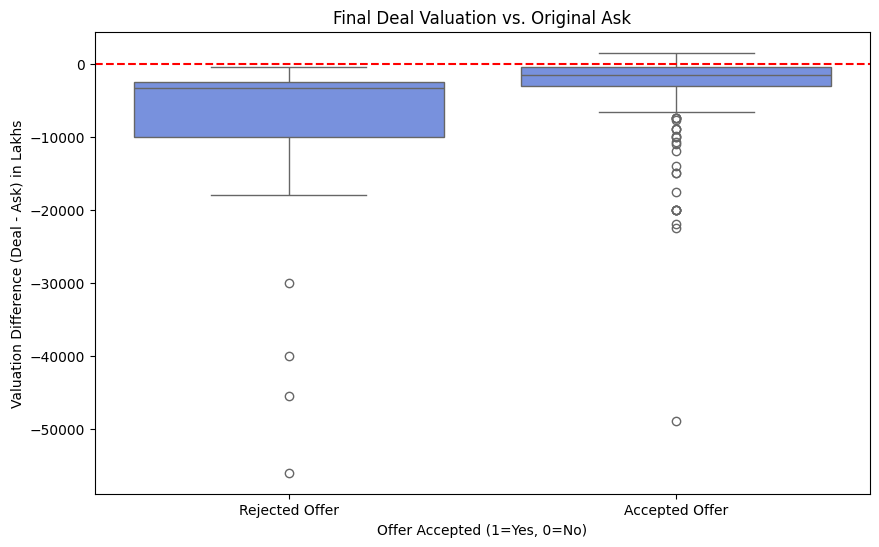


--- Acceptance Rate by Number of Sharks in Deal ---
Number of Sharks in Deal
1.0    100.0
2.0    100.0
3.0    100.0
4.0    100.0
5.0    100.0
Name: Accepted Offer, dtype: float64
Generated 'shark_acceptance_rate.png'


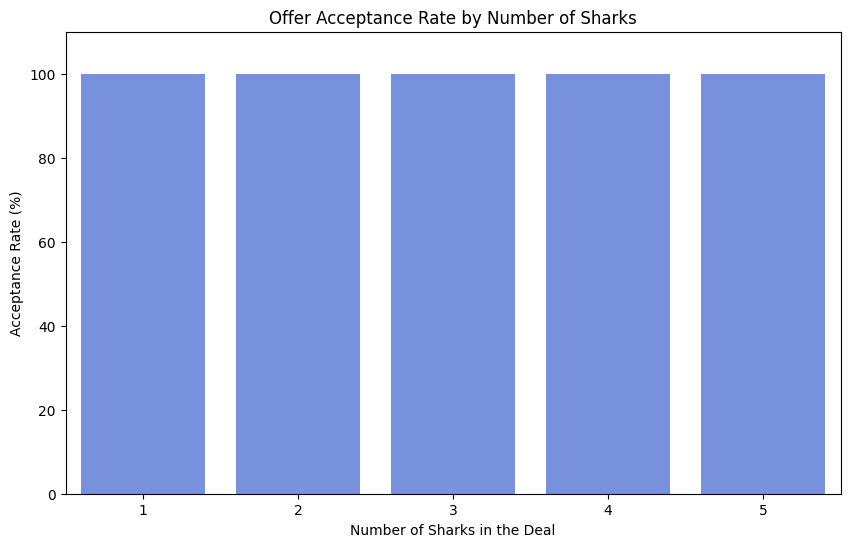


--- Acceptance Rate for Deals With and Without Debt ---
Has_Debt
Deal Includes Debt    100.000000
Equity Only Deal       81.896552
Name: Accepted Offer, dtype: float64
Generated 'debt_acceptance_rate.png'


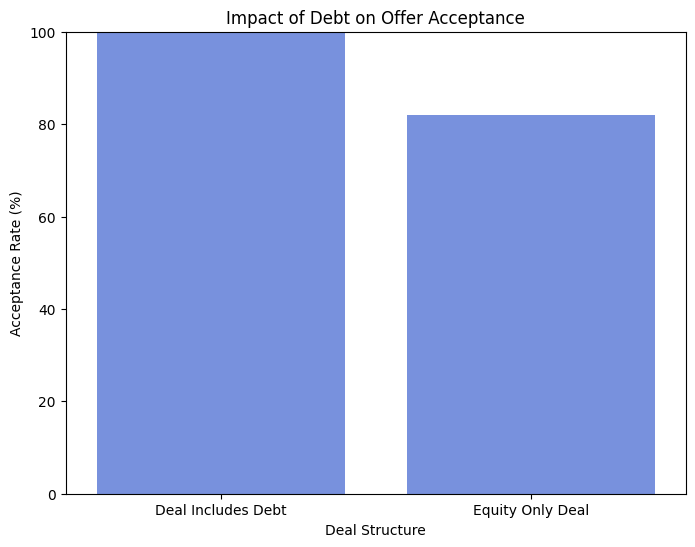

In [ ]:
# --- Part 2: Analysis of Deciding Factors ---

# We only care about pitches that actually received an offer
offers_received_df = df[df['Received Offer'] == 1].copy()

# Create new features to compare the deal vs. the ask
offers_received_df['Valuation_Difference'] = offers_received_df['Deal Valuation'] - offers_received_df['Valuation Requested']
offers_received_df['Equity_Difference'] = offers_received_df['Total Deal Equity'] - offers_received_df['Original Offered Equity']

# --- 2.1. Valuation and Equity Analysis ---
print("--- Analysis of Valuation and Equity Differences ---")
print(offers_received_df.groupby('Accepted Offer')[['Valuation_Difference', 'Equity_Difference']].mean())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Accepted Offer', y='Valuation_Difference', data=offers_received_df)
plt.title('Final Deal Valuation vs. Original Ask')
plt.ylabel('Valuation Difference (Deal - Ask) in Lakhs')
plt.xlabel('Offer Accepted (1=Yes, 0=No)')
plt.xticks([0, 1], ['Rejected Offer', 'Accepted Offer'])
plt.axhline(0, color='r', linestyle='--')
plt.show()

# --- 2.2. Number of Sharks Analysis ---
shark_acceptance_rate = offers_received_df.groupby('Number of Sharks in Deal')['Accepted Offer'].mean().mul(100)
shark_acceptance_rate = shark_acceptance_rate[shark_acceptance_rate.index > 0]
print("\n--- Acceptance Rate by Number of Sharks in Deal ---")
print(shark_acceptance_rate)

plt.figure(figsize=(10, 6))
sns.barplot(x=shark_acceptance_rate.index.astype(int), y=shark_acceptance_rate.values)
plt.title('Offer Acceptance Rate by Number of Sharks')
plt.xlabel('Number of Sharks in the Deal')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 110)
plt.show()

# --- 2.3. Debt Analysis ---
offers_received_df['Has_Debt'] = np.where(offers_received_df['Total Deal Debt'] > 0, 'Deal Includes Debt', 'Equity Only Deal')
debt_acceptance_rate = offers_received_df.groupby('Has_Debt')['Accepted Offer'].mean().mul(100)
print("\n--- Acceptance Rate for Deals With and Without Debt ---")
print(debt_acceptance_rate)

plt.figure(figsize=(8, 6))
sns.barplot(x=debt_acceptance_rate.index, y=debt_acceptance_rate.values)
plt.title('Impact of Debt on Offer Acceptance')
plt.xlabel('Deal Structure')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()